In [39]:
import numpy as np
from scipy.spatial.distance import cdist
d2_data = np.loadtxt("data\D2z.txt")
d2_points = d2_data[:, :2]
#d2_iter = np.flatiter(d2_data, flags=["c_index"])
test_point = np.array([0.2, 0.3, 1]).reshape((1,3))
distance = cdist(d2_data[:, :2], test_point[:, :2])
knn_idx = np.argsort(distance, axis=0)[:5].reshape(5)
knn = d2_data[knn_idx, :]

In [40]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import mode
def knn_point(test_dpoint, train_points, k, ret_dist=False):
    dims = train_points.shape[1] -1
    test_dpoint = np.reshape(test_dpoint, (1, 3))
    distances = cdist(train_points[:, :], test_dpoint[:, :])
    knn_idx = np.argsort(distances, axis=0)[:k].reshape(k)
    knn = train_points[knn_idx,:]
    classification = mode(knn[:, 2]).mode[0]
    return classification

def knn_funct(training_data, test_data, k):
    final_arr = np.apply_along_axis(knn_point, axis=1, arr=test_data, train_points=training_data, k=k)
    return final_arr
test_points = np.array([[0.2, 0.3, 1], [0.4, 0.5, 1]])
arr = knn_funct(d2_data, test_points, 3)

C:\Users\zachd\AppData\Local\Temp\ipykernel_14276\4253983252.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classification = mode(knn[:, 2]).mode[0]


In [41]:
# Q2 Answers
# Red = 0, green = 1
import numpy as np
import pandas as pd
import knn
train_data = np.array([[0,3,0,0], [2,0,0,0], [0,1,3,0], [0,1,2,1], [-1,0,1,1], [1,1,1,0]], dtype=float)
test_point = np.array([0,0,0,2], dtype=float)
class_asn, distances = knn.knn_point(test_point, train_data, k=1, ret_dist=True)
dist_dframe = pd.DataFrame(np.concatenate([train_data, distances], axis=1), columns=["X_1", "X_2", "X_3", "Y", "Distance from (0,0,0)"])
color_map = {0:"Red", 1:"Green"}
dist_dframe["Y"] = dist_dframe["Y"].map(color_map)
print(dist_dframe.to_latex(index=False))

\begin{tabular}{rrrlr}
\toprule
 X\_1 &  X\_2 &  X\_3 &     Y &  Distance from (0,0,0) \\
\midrule
 0.0 &  3.0 &  0.0 &   Red &               3.000000 \\
 2.0 &  0.0 &  0.0 &   Red &               2.000000 \\
 0.0 &  1.0 &  3.0 &   Red &               3.162278 \\
 0.0 &  1.0 &  2.0 & Green &               2.236068 \\
-1.0 &  0.0 &  1.0 & Green &               1.414214 \\
 1.0 &  1.0 &  1.0 &   Red &               1.732051 \\
\bottomrule
\end{tabular}



c:\Users\zachd\Documents\CS760_HW\HW3\knn.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classification = mode(knn[:, dims]).mode[0]
C:\Users\zachd\AppData\Local\Temp\ipykernel_14276\4000198.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dist_dframe.to_latex(index=False))


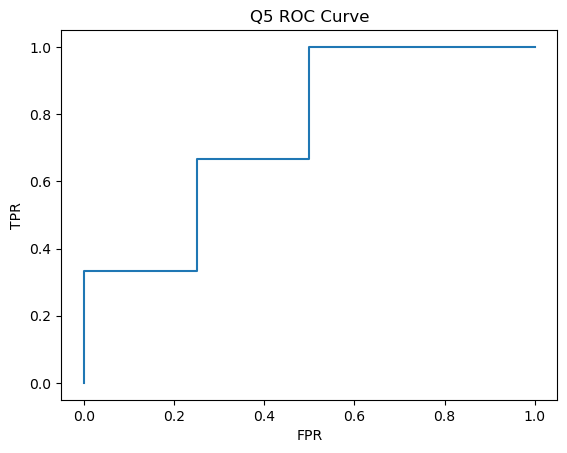

In [59]:
#Q5 ROC curve info
from sklearn import metrics
from matplotlib import pyplot as plt
confidence_positive = np.array([0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1])
correct_class = np.array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0])
q5_roc = metrics.roc_curve(correct_class, confidence_positive)
thresholds = q5_roc[2]
plt.plot(q5_roc[0], q5_roc[1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Q5 ROC Curve")
plt.show()

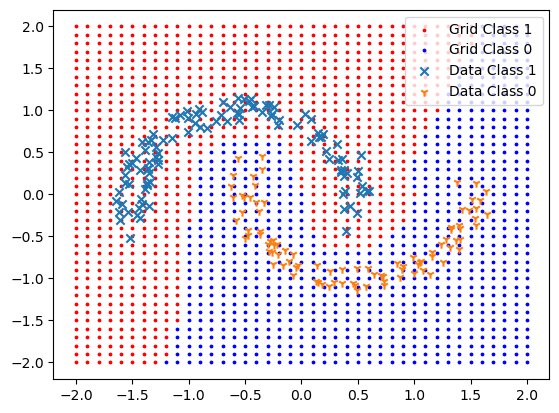

In [43]:
# Programming Q1 KNN
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
onenn = KNeighborsClassifier(1)
d2_data = np.loadtxt("data\D2z.txt")
d2_xvals = d2_data[:, :2]
d2_yvals = d2_data[:, 2]
onenn.fit(d2_xvals, d2_yvals)

# Generate grid vals
grid_vals = np.meshgrid(np.linspace(-2, 2, 41), np.linspace(-2, 2, 41))
grid_points = np.array([grid_vals[0].flatten(), grid_vals[1].flatten()]).transpose()
grid_labels = onenn.predict(grid_points)
knn_grid = np.concatenate([grid_points[:, :2], grid_labels.reshape(grid_labels.shape[0], 1)], axis=1)
plt.scatter(knn_grid[knn_grid[:, 2] == 1][:, 0], knn_grid[knn_grid[:, 2] == 1][:, 1], color='r', s=3,  label="Grid Class 1")
plt.scatter(knn_grid[knn_grid[:, 2] == 0][:, 0], knn_grid[knn_grid[:, 2] == 0][:, 1], color='b', s=3, label="Grid Class 0")
plt.scatter(d2_data[d2_data[:,2] == 1][:, 0], d2_data[d2_data[:, 2] == 1][:, 1], marker="x", label="Data Class 1")
plt.scatter(d2_data[d2_data[:,2] == 0][:, 0], d2_data[d2_data[:, 2] == 0][:, 1], marker="1", label="Data Class 0")
plt.legend()
plt.show()


In [44]:
# Load Emails Dataset 
import pandas as pd
import sklearn.metrics as metrics
emails_raw = pd.read_csv("data\emails.csv").set_index("Email No.", drop=True)
email_columns = list(emails_raw.columns)
emails_samples = list(emails_raw.index)

# Generate email features and predictions
email_X = emails_raw[email_columns[:len(email_columns) -1]].to_numpy()
email_Y = emails_raw[email_columns[len(email_columns) -1]].to_numpy()

# Generate email CV folds:
email_cv_indices = [(0, 1000), (1000, 2001), (2000, 3001), (3000, 4001),(4000, 5001)]
cv_data = []
for interval in email_cv_indices:
    test_x = email_X[interval[0]:interval[1], :]
    test_y = email_Y[interval[0]:interval[1]]
    if interval[0] == 0:
        train_x = email_X[interval[1]:, :]
        train_y = email_Y[interval[1]:]
    elif interval[1] == email_X.shape[0] - 1:
        train_x = email_X[interval[0]:, :]
        train_y = email_Y[interval[1]:]
    else:
        train_x = np.concatenate((email_X[0: interval[0], :], email_X[interval[1]:, :]))
        train_y = np.concatenate((email_Y[0: interval[0]], email_Y[interval[1]:]))
    cv_data.append([train_x, test_x, train_y, test_y])

# quick function to do CV for a given classifier
# Note: SKLEARN has this function built in as: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
# Using SKLEARN function here would be far more work than just doing this myself
def cross_validate(
        ml_algorithm, cv_set, df_labels=["Fold", "Accuracy", "Precision", "Recall"],
        scoring_metrics=[metrics.accuracy_score, metrics.precision_score, metrics.recall_score]
    ):
    result_set = list()
    for index, (train_x, test_x, train_y, test_y) in enumerate(cv_set):
        ml_algorithm.fit(train_x, train_y)
        test_y_predictions = ml_algorithm.predict(test_x)
        fold_result = [f'Fold {index + 1}']
        for metric in scoring_metrics:
            score = metric(test_y, test_y_predictions)
            fold_result.append(score)
        result_set.append(fold_result)
    result_df = pd.DataFrame(result_set, columns=df_labels)
    return result_df

In [45]:
# 1 NN Cross validation
onenn = KNeighborsClassifier(1)
nn_one_results = cross_validate(onenn, cv_data)
print(nn_one_results.to_latex(column_format="1 1 1 1", float_format="%.3f", index=False))


\begin{tabular}{1 1 1 1}
\toprule
  Fold &  Accuracy &  Precision &  Recall \\
\midrule
Fold 1 &     0.825 &      0.654 &   0.818 \\
Fold 2 &     0.853 &      0.686 &   0.866 \\
Fold 3 &     0.863 &      0.724 &   0.839 \\
Fold 4 &     0.850 &      0.716 &   0.814 \\
Fold 5 &     0.775 &      0.606 &   0.758 \\
\bottomrule
\end{tabular}



C:\Users\zachd\AppData\Local\Temp\ipykernel_14276\3942994472.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(nn_one_results.to_latex(column_format="1 1 1 1", float_format="%.3f", index=False))


In [46]:
# Q3 Log Regression
from LogisticRegression import LogisticRegression
initial_train_X, initial_test_x, initial_train_y, initial_test_y  = cv_data[2]
# Quick search of learning rates
# First search used [0.001, 0.005, 0.01, 0.05, 0.1] second search used [0.002, 0.004, 0.006]
param_list = [0.002, 0.004, 0.006]
result_list = list()
for param in param_list:
    test_logreg = LogisticRegression(n_epochs=750, learning_rate=param)
    test_logreg.fit(initial_train_X, initial_train_y)
    result_list.append((param, np.array(test_logreg.loss_list)))

c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:23: RuntimeWarning: divide by zero encountered in log2
  loss_term2 = (1-data_Y)*np.log2(1-pred_y)
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:23: RuntimeWarning: invalid value encountered in multiply
  loss_term2 = (1-data_Y)*np.log2(1-pred_y)


epoch0


c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:14: RuntimeWarning: overflow encountered in exp
  value = 1/ (1+np.exp(-z))
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:21: RuntimeWarning: divide by zero encountered in log2
  loss_term1 = data_Y*np.log2(pred_y)
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:21: RuntimeWarning: invalid value encountered in multiply
  loss_term1 = data_Y*np.log2(pred_y)


epoch150
epoch300
epoch450
epoch600
epoch0
epoch150
epoch300
epoch450
epoch600
epoch0
epoch150
epoch300
epoch450
epoch600


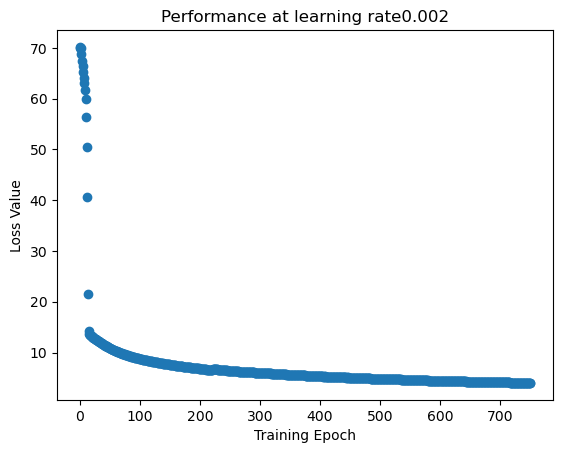

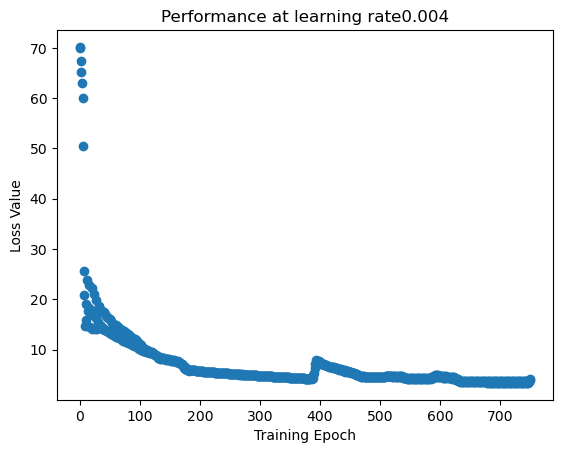

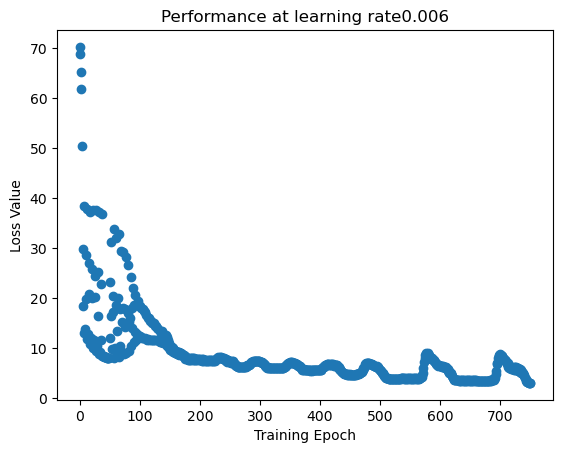

In [47]:
# 3 Log regression learning rate optimization
for learn_rate, loss_array in result_list:
    plt.scatter(np.linspace(0, 750, num=751), loss_array)
    plt.xlabel("Training Epoch")
    plt.ylabel("Loss Value")
    plt.title("Performance at learning rate" + str(learn_rate))
    plt.show()



In [48]:
# Q3 logistic regression 5F cross validation
opt_lr = 0.004
opt_num_epochs = 500
log_reg = LogisticRegression(learning_rate=opt_lr, n_epochs=opt_num_epochs)
log_reg_cv = cross_validate(log_reg, cv_set=cv_data)
print(log_reg_cv.to_latex(column_format="1 1 1 1", float_format="%.3f", index=False))


epoch0
epoch150
epoch300
epoch450


c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:23: RuntimeWarning: divide by zero encountered in log2
  loss_term2 = (1-data_Y)*np.log2(1-pred_y)
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:23: RuntimeWarning: invalid value encountered in multiply
  loss_term2 = (1-data_Y)*np.log2(1-pred_y)


epoch0


c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:14: RuntimeWarning: overflow encountered in exp
  value = 1/ (1+np.exp(-z))
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:21: RuntimeWarning: divide by zero encountered in log2
  loss_term1 = data_Y*np.log2(pred_y)
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:21: RuntimeWarning: invalid value encountered in multiply
  loss_term1 = data_Y*np.log2(pred_y)


epoch150
epoch300
epoch450


c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:23: RuntimeWarning: divide by zero encountered in log2
  loss_term2 = (1-data_Y)*np.log2(1-pred_y)
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:23: RuntimeWarning: invalid value encountered in multiply
  loss_term2 = (1-data_Y)*np.log2(1-pred_y)


epoch0


c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:14: RuntimeWarning: overflow encountered in exp
  value = 1/ (1+np.exp(-z))
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:21: RuntimeWarning: divide by zero encountered in log2
  loss_term1 = data_Y*np.log2(pred_y)
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:21: RuntimeWarning: invalid value encountered in multiply
  loss_term1 = data_Y*np.log2(pred_y)


epoch150
epoch300
epoch450


c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:23: RuntimeWarning: divide by zero encountered in log2
  loss_term2 = (1-data_Y)*np.log2(1-pred_y)
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:23: RuntimeWarning: invalid value encountered in multiply
  loss_term2 = (1-data_Y)*np.log2(1-pred_y)


epoch0


c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:14: RuntimeWarning: overflow encountered in exp
  value = 1/ (1+np.exp(-z))
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:21: RuntimeWarning: divide by zero encountered in log2
  loss_term1 = data_Y*np.log2(pred_y)
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:21: RuntimeWarning: invalid value encountered in multiply
  loss_term1 = data_Y*np.log2(pred_y)


epoch150
epoch300
epoch450


c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:23: RuntimeWarning: divide by zero encountered in log2
  loss_term2 = (1-data_Y)*np.log2(1-pred_y)
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:23: RuntimeWarning: invalid value encountered in multiply
  loss_term2 = (1-data_Y)*np.log2(1-pred_y)


epoch0


c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:14: RuntimeWarning: overflow encountered in exp
  value = 1/ (1+np.exp(-z))
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:21: RuntimeWarning: divide by zero encountered in log2
  loss_term1 = data_Y*np.log2(pred_y)
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:21: RuntimeWarning: invalid value encountered in multiply
  loss_term1 = data_Y*np.log2(pred_y)


epoch150
epoch300
epoch450
\begin{tabular}{1 1 1 1}
\toprule
  Fold &  Accuracy &  Precision &  Recall \\
\midrule
Fold 1 &     0.773 &      0.603 &   0.596 \\
Fold 2 &     0.786 &      0.605 &   0.653 \\
Fold 3 &     0.776 &      0.588 &   0.716 \\
Fold 4 &     0.737 &      0.558 &   0.519 \\
Fold 5 &     0.660 &      0.436 &   0.376 \\
\bottomrule
\end{tabular}



C:\Users\zachd\AppData\Local\Temp\ipykernel_14276\2313462400.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(log_reg_cv.to_latex(column_format="1 1 1 1", float_format="%.3f", index=False))


In [49]:
print(log_reg_cv.to_latex(column_format="1 1 1 1", float_format="%.3f", index=False))

\begin{tabular}{1 1 1 1}
\toprule
  Fold &  Accuracy &  Precision &  Recall \\
\midrule
Fold 1 &     0.773 &      0.603 &   0.596 \\
Fold 2 &     0.786 &      0.605 &   0.653 \\
Fold 3 &     0.776 &      0.588 &   0.716 \\
Fold 4 &     0.737 &      0.558 &   0.519 \\
Fold 5 &     0.660 &      0.436 &   0.376 \\
\bottomrule
\end{tabular}



C:\Users\zachd\AppData\Local\Temp\ipykernel_14276\70273451.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(log_reg_cv.to_latex(column_format="1 1 1 1", float_format="%.3f", index=False))


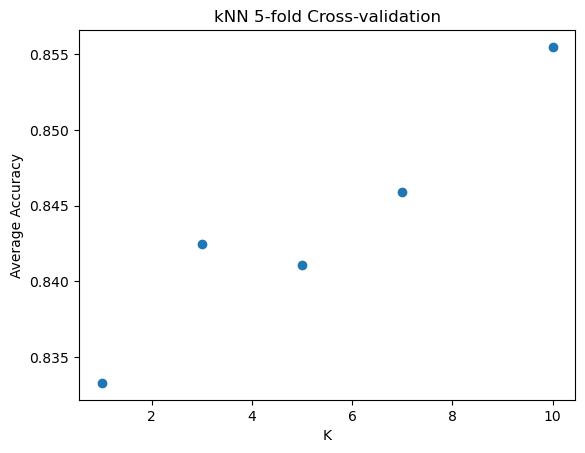

\begin{tabular}{1 | 1}
\toprule
 K &  Avg Accuracy \\
\midrule
 1 &         0.833 \\
 3 &         0.842 \\
 5 &         0.841 \\
 7 &         0.846 \\
10 &         0.855 \\
\bottomrule
\end{tabular}



C:\Users\zachd\AppData\Local\Temp\ipykernel_14276\3541553669.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(knn_res_df.to_latex(column_format="1 | 1", float_format="%.3f", index=False))


In [50]:
# Q4 kNN CV
knn_res_list = []
for k in [1, 3, 5, 7, 10]:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_cv = cross_validate(knn_classifier, cv_set=cv_data)
    avg_acc = knn_cv["Accuracy"].mean()
    knn_res_list.append([k, avg_acc])
knn_res_df = pd.DataFrame(knn_res_list, columns=["K", "Avg Accuracy"])
plt.scatter(knn_res_df["K"], knn_res_df["Avg Accuracy"])
plt.title("kNN 5-fold Cross-validation")
plt.xlabel("K")
plt.ylabel("Average Accuracy")
plt.show()
print(knn_res_df.to_latex(column_format="1 | 1", float_format="%.3f", index=False))



In [51]:
# Generate ROC curves for 5-NN and Logistic regression
q5_train_X, q5_test_x, q5_train_y, q5_test_y  = cv_data[3]

opt_lr = 0.004
opt_num_epochs = 500
log_reg = LogisticRegression(learning_rate=opt_lr, n_epochs=opt_num_epochs)
log_reg.fit(q5_train_X, q5_train_y)
log_reg_y_probs = log_reg.predict_proba(q5_test_x)
log_reg_roc = metrics.roc_curve(q5_test_y, log_reg_y_probs)



c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:23: RuntimeWarning: divide by zero encountered in log2
  loss_term2 = (1-data_Y)*np.log2(1-pred_y)
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:23: RuntimeWarning: invalid value encountered in multiply
  loss_term2 = (1-data_Y)*np.log2(1-pred_y)


epoch0


c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:14: RuntimeWarning: overflow encountered in exp
  value = 1/ (1+np.exp(-z))
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:21: RuntimeWarning: divide by zero encountered in log2
  loss_term1 = data_Y*np.log2(pred_y)
c:\Users\zachd\Documents\CS760_HW\HW3\LogisticRegression.py:21: RuntimeWarning: invalid value encountered in multiply
  loss_term1 = data_Y*np.log2(pred_y)


epoch150
epoch300
epoch450


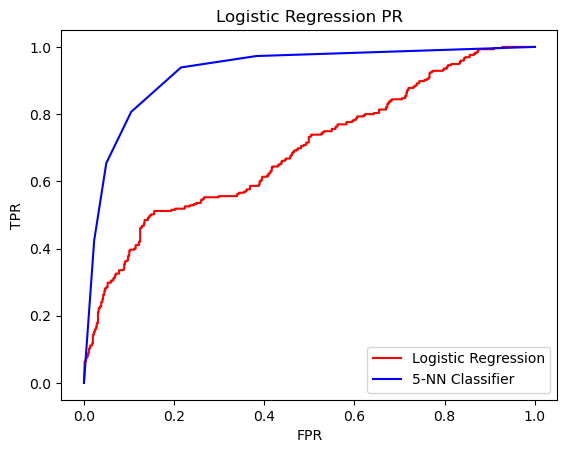

In [52]:
knn_class_q5 = KNeighborsClassifier(n_neighbors=5)
knn_class_q5.fit(q5_train_X, q5_train_y)
knn_probs = knn_class_q5.predict_proba(q5_test_x)
knn_roc = metrics.roc_curve(q5_test_y, knn_probs[:, 1])


plt.plot(log_reg_roc[0], log_reg_roc[1], color="r", label="Logistic Regression")
plt.plot(knn_roc[0], knn_roc[1], color="b", label="5-NN Classifier")
plt.title("Logistic Regression PR")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

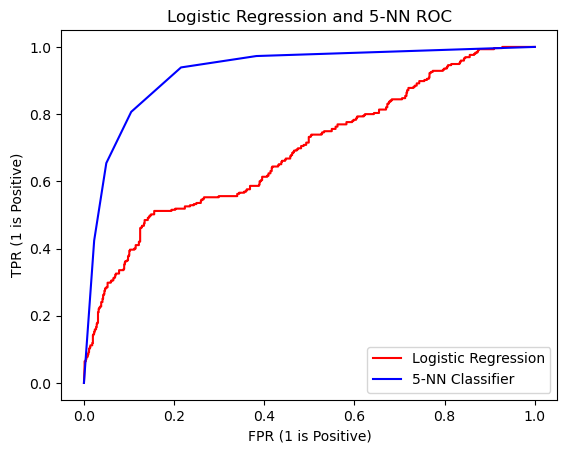

In [55]:
plt.plot(log_reg_roc[0], log_reg_roc[1], color="r", label="Logistic Regression")
plt.plot(knn_roc[0], knn_roc[1], color="b", label="5-NN Classifier")
plt.title("Logistic Regression and 5-NN ROC")
plt.xlabel("FPR (1 is Positive)")
plt.ylabel("TPR (1 is Positive)")
plt.legend()
plt.show()